In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode

In [2]:
dataset = pd.DataFrame(pd.read_excel("tsla_2020.xlsx"))
dataset.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [3]:
dataset.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,86.139999,84.342003,84.900002,86.052002,47660500,86.052002
1,2020-01-03,90.800003,87.384003,88.099998,88.601997,88892500,88.601997
2,2020-01-06,90.311996,88.000000,88.094002,90.307999,50665000,90.307999
3,2020-01-07,94.325996,90.671997,92.279999,93.811996,89410500,93.811996
4,2020-01-08,99.697998,93.646004,94.739998,98.428001,155721500,98.428001


In [4]:
dataset['Open-Close'] = dataset.Open - dataset.Close
dataset['High-Low'] = dataset.High - dataset.Low
dataset = dataset.dropna()
X = dataset[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
0,-1.152000,1.797997
1,-0.501999,3.416000
2,-2.213997,2.311996
3,-1.531998,3.653999
4,-3.688004,6.051994


In [5]:
Y= np.where(dataset['Close'].shift(-1)>dataset['Close'],1,-1)

In [6]:
split_percentage = 0.8
split = int(split_percentage*len(dataset))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[:split]
Y_test = Y[:split]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
x = range(1, 31)
n_neighbors_value = []
accuracy_train_value = []
accuracy_test_value = []

for n_neighbors in x:  
    knn = KNeighborsClassifier(n_neighbors)
    #Fitting the data for x and y VARIABLE
    knn.fit(X_train, Y_train)
    #trainnig the accuracy train and and test data
    accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
    accuracy_test = accuracy_score(Y_test, knn.predict(X_test))
    print(r'For k=' ,n_neighbors)
    print(f'accuracy_train: ' ,accuracy_train)
    print(f'accuracy_test : ' ,accuracy_test)
    n_neighbors_value.append(n_neighbors)
    accuracy_train_value.append(accuracy_train)
    accuracy_test_value.append(accuracy_test)
    print(confusion_matrix(Y_test, knn.predict(X_test)))

For k= 1
accuracy_train:  1.0
accuracy_test :  1.0
[[ 87   0]
 [  0 115]]
For k= 2
accuracy_train:  0.7772277227722773
accuracy_test :  0.7772277227722773
[[87  0]
 [45 70]]
For k= 3
accuracy_train:  0.7871287128712872
accuracy_test :  0.7871287128712872
[[ 58  29]
 [ 14 101]]
For k= 4
accuracy_train:  0.7326732673267327
accuracy_test :  0.7326732673267327
[[69 18]
 [36 79]]
For k= 5
accuracy_train:  0.698019801980198
accuracy_test :  0.698019801980198
[[49 38]
 [23 92]]
For k= 6
accuracy_train:  0.7079207920792079
accuracy_test :  0.7079207920792079
[[61 26]
 [33 82]]
For k= 7
accuracy_train:  0.7079207920792079
accuracy_test :  0.7079207920792079
[[49 38]
 [21 94]]
For k= 8
accuracy_train:  0.6732673267326733
accuracy_test :  0.6732673267326733
[[56 31]
 [35 80]]
For k= 9
accuracy_train:  0.6435643564356436
accuracy_test :  0.6435643564356436
[[43 44]
 [28 87]]
For k= 10
accuracy_train:  0.6485148514851485
accuracy_test :  0.6485148514851485
[[55 32]
 [39 76]]
For k= 11
accuracy_trai

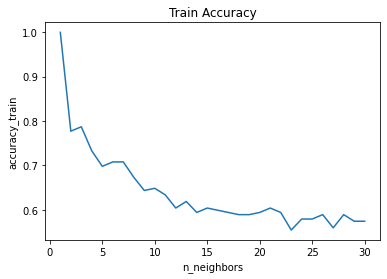

In [9]:
from matplotlib import pyplot as plt
plt.plot(n_neighbors_value, accuracy_train_value)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_train')
plt.title('Train Accuracy')
plt.show()

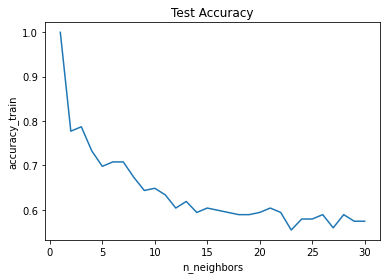

In [10]:
plt.plot(n_neighbors_value, accuracy_test_value)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy_train')
plt.title('Test Accuracy')
plt.show()

In [11]:
corrM = dataset.corr()
corrM

,High,Low,Open,Close,Volume,Adj Close,Open-Close,High-Low
High,1.000000,0.998116,0.998722,0.998931,-0.347166,0.998931,-0.107740,0.653832
Low,0.998116,1.000000,0.998407,0.998407,-0.383821,0.998407,-0.104925,0.606177
Open,0.998722,0.998407,1.000000,0.997204,-0.365506,0.997204,-0.067755,0.633676
Close,0.998931,0.998407,0.997204,1.000000,-0.360490,1.000000,-0.142125,0.636377
Volume,-0.347166,-0.383821,-0.365506,-0.360490,1.000000,-0.360490,-0.028563,0.233127
Adj Close,0.998931,0.998407,0.997204,1.000000,-0.360490,1.000000,-0.142125,0.636377
Open-Close,-0.107740,-0.104925,-0.067755,-0.142125,-0.028563,-0.142125,1.000000,-0.102650
High-Low,0.653832,0.606177,0.633676,0.636377,0.233127,0.636377,-0.102650,1.000000


In [19]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train, Y_train)
y_pred = knn_final.predict(X_test)

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.81      0.67      0.73        87
           1       0.78      0.88      0.82       115

    accuracy                           0.79       202
   macro avg       0.79      0.77      0.78       202
weighted avg       0.79      0.79      0.78       202



In [13]:
y_pred

array([ 1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1,
        1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,
        1, -1,  1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,
        1, -1,  1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1, -1,  1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,
        1, -1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1])